In [4]:
# Upload Dataset
from google.colab import files
uploaded = files.upload()

# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load Dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving superstore_dataset.csv to superstore_dataset (2).csv


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load and clean
df = pd.read_csv('superstore_dataset.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # normalize column names

# Convert dates
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.to_period('M')


<ipython-input-6-a06a0e235ed1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None)


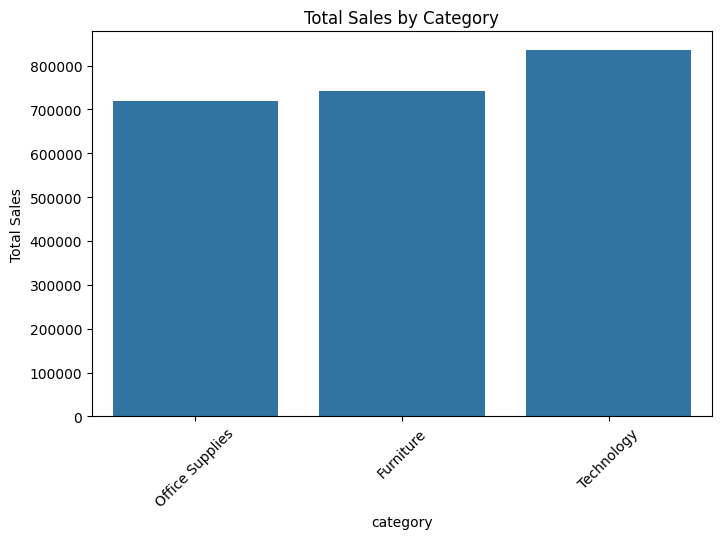

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [7]:
region_profit = df.groupby('region')['profit'].sum().reset_index()
fig = px.bar(region_profit, x='region', y='profit', color='profit', title='Total Profit by Region')
fig.show()


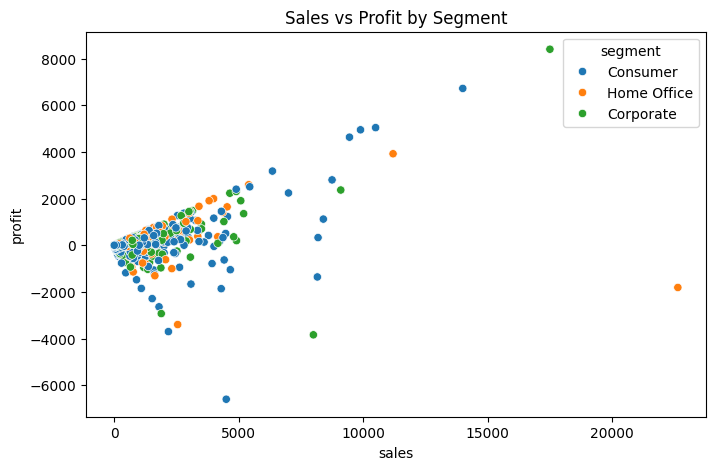

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='sales', y='profit', hue='segment')
plt.title('Sales vs Profit by Segment')
plt.show()


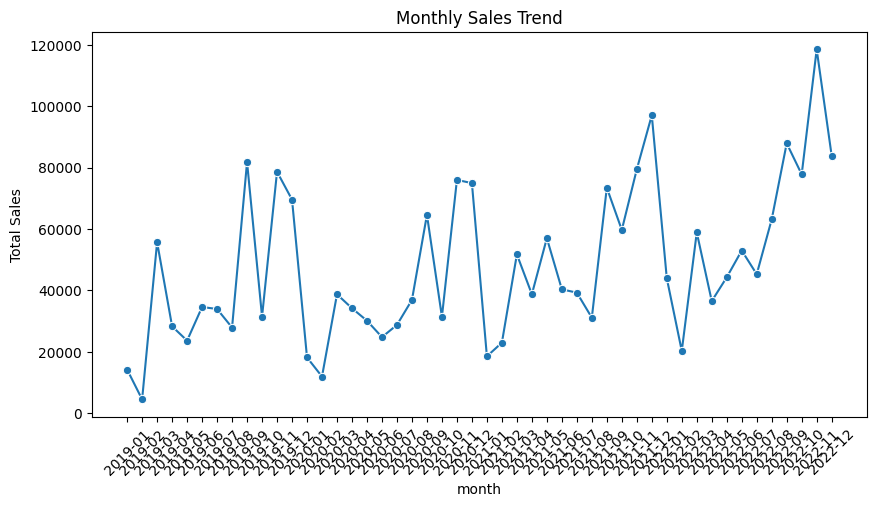

In [10]:
# Group sales by month and convert Period to string
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)  # or .dt.to_timestamp() if needed

# Now plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='month', y='sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()


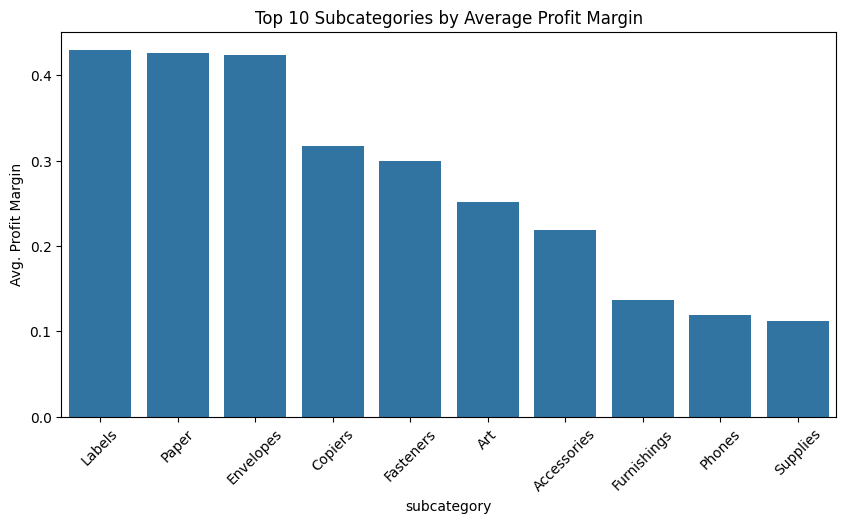

In [11]:
top_subcat = df.groupby('subcategory')['profit_margin'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_subcat.index, y=top_subcat.values)
plt.xticks(rotation=45)
plt.title('Top 10 Subcategories by Average Profit Margin')
plt.ylabel('Avg. Profit Margin')
plt.show()
